In this notebook, we are interested in finding a correlation between geosmin and taste and odor. For this, we'll be utilizing the data generated by the `guandu_extract_and_clean` notebook.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os

In [2]:
csvdir = os.path.join('output', 'guandu')

We'll be using geosmin data with NETA and VETA separated, because then we can cross-check if taste and odor (which are also with separated NETA and VETA samples).

In [55]:
gm_df = pd.read_csv(os.path.join(csvdir, 'geosmin_2020-10-23_today.csv'), index_col='date')
gm_df.drop(columns=['capture_geosmin', 'is_capture_geosmin_ub'], inplace=True)
for eta in ('veta', 'neta'):
    col = '{}_geosmin'.format(eta)
    is_col_ub = 'is_{}_geosmin_ub'.format(eta)
    gm_df.loc[gm_df[is_col_ub], col] = np.nan
    gm_df.drop(columns=[is_col_ub], inplace=True)

In [57]:
gm_df.shape

(231, 2)

In [64]:
gm_df.sample(n=10)

,veta_geosmin,neta_geosmin
date,,
2021-01-21,NaN,NaN
2021-03-30,0.109,0.018
2020-11-28,NaN,NaN
2021-04-11,0.027,NaN
2021-01-22,NaN,NaN
2021-04-28,0.005,NaN
2020-12-03,NaN,NaN
2021-03-22,0.061,NaN
2021-06-05,NaN,NaN


In [59]:
to_df = pd.read_csv(os.path.join(csvdir, 'taste_and_odor.csv'), index_col='date')
for eta in ('veta', 'neta'):
    for param in ('taste', 'odor'):
        col = '{}_{}'.format(eta, param)
        is_col_ub = 'is_{}_{}_ub'.format(eta, param)
        to_df.loc[to_df[is_col_ub], col] = np.nan
        to_df.drop(columns=[is_col_ub], inplace=True)

In [60]:
to_df.shape

(394, 4)

In [66]:
to_df.sample(n=10)

,neta_taste,neta_odor,veta_taste,veta_odor
date,,,,
2020-10-06,1.0,2.0,1.0,2.0
2020-03-03,2.0,2.0,2.0,2.0
2020-05-04,NaN,NaN,NaN,NaN
2020-12-24,2.0,1.0,2.0,1.0
2020-02-15,2.0,2.0,2.0,2.0
2020-11-24,1.0,1.0,1.0,1.0
2021-04-16,1.0,1.0,2.0,1.0
2021-03-31,4.0,2.0,8.0,2.0
2020-05-15,NaN,NaN,NaN,NaN


We combine all these data frames into one.

In [68]:
df = pd.concat((gm_df, to_df), axis=1)

In [69]:
df.shape

(437, 6)

In [70]:
df.sample(n=10)

,veta_geosmin,neta_geosmin,neta_taste,neta_odor,veta_taste,veta_odor
date,,,,,,
2021-03-01,NaN,NaN,1.0,1.0,2.0,1.0
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28,NaN,NaN,1.0,1.0,1.0,1.0
2020-09-08,NaN,NaN,1.0,1.0,1.0,1.0
2021-04-28,0.005,NaN,3.0,1.0,3.0,1.0
2021-04-03,0.516,0.08,2.0,1.0,8.0,2.0
2020-08-29,NaN,NaN,1.0,1.0,2.0,1.0
2021-03-09,0.012,NaN,1.0,1.0,2.0,1.0


In [75]:
df.count()

veta_geosmin     63
neta_geosmin     23
neta_taste      346
neta_odor       346
veta_taste      346
veta_odor       346
dtype: int64

We make a correlation matrix between taste, odor and geosmin.

In [71]:
corr = df.corr()

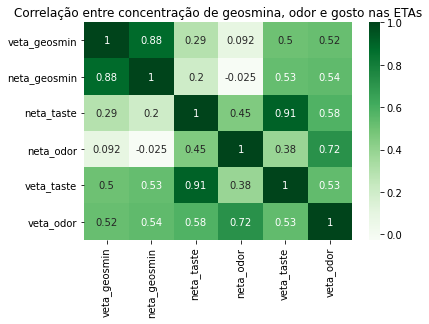

In [73]:
plt.figure()
plt.title('Correlação entre concentração de geosmina, odor e gosto nas ETAs')
sn.heatmap(corr, annot=True, cmap='Greens')
plt.show()

We see that:
* Taste correlate with 91% amongst ETAs
* Geosmin concentration correlate with 88% amongst ETAs
* Odor correlate with 72% amongst ETAs
* Taste x Geosmin don't correlate in NETA (20%)
* Odor x Geosmin don't correlate in NETA (-0.25%)
* Taste x Geosmin correlate poorly in VETA (53%)
* Odor x Geosmin correlate poorly in VETA (54%)